# **Ciencia de Datos 2021** <font size=4 color='gray'>Alan Reyes-Figueroa</font>
#### <font color='gray'>Lab 02: Procesamiento de imágenes</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
#from PIL import Image

## 1. PCA con imágenes

In [2]:
I = plt.imread('quetzal.png')
I.shape

(550, 500, 3)

In [3]:
Igray = rgb2gray(I)

In [4]:
def image2vectorblocks(I, sh):
    (h, w) = I.shape[:2]
    stack = []
    
    for i in range(0, h//sh):
        for j in range(0, w//sh):
            block = I[sh*i:sh*(i+1), sh*j:sh*(j+1)].ravel()
            stack.append(block)
    stack = np.array(stack)
    return stack

In [18]:
def vectorblocks2image(stack, I, sh):
    (h, w) = I.shape[:2]
    J = np.zeros((h, w))
    
    for i in range(0, stack.shape[0]):
        r = i * sh // w
        c = i - r*(w // sh)
        block = stack[i,:].reshape(sh,sh)
        J[sh*r:sh*r+sh, sh*c:sh*c+sh] = block
    return J

In [6]:
sh = 20
stack = image2vectorblocks(Igray, sh)
stack.shape

(675, 400)

In [7]:
U, S, V = np.linalg.svd(stack)
print(U.shape, S.shape, V.shape)

(675, 675) (400,) (400, 400)


In [8]:
S = np.diag(S)
S.shape

(400, 400)

In [22]:
ks = [1,2,3,4,5,10,15,20,30,40,50,60,70,80,90,100]

approx = []

for k in ks:
    appk = U[:,:k] @ S[:k,:k] @ V[:k,:] 
    J = vectorblocks2image(appk, Igray, sh)
    approx.append(J)

In [20]:
J = vectorblocks2image(stack, Igray, sh)
J.shape

(550, 500)

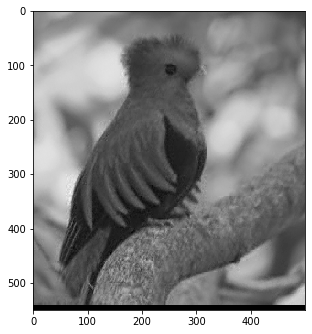

In [36]:
plt.figure(figsize=(5,5.5))
plt.imshow(approx[7], cmap='gray')
plt.show()

## 2. Leer oef2.dat y crimes.dat

In [37]:
import pandas as pd

In [38]:
data1 = pd.read_csv('crimes.dat', sep=',')

In [39]:
data1

,Crime,No.,1,2,3,4,5,6,7
0,Murder,1,1.00,0.52,0.34,0.81,0.28,0.06,0.11
1,Rape,2,0.52,1.00,0.55,0.70,0.68,0.60,0.44
2,Robbery,3,0.34,0.55,1.00,0.56,0.62,0.44,0.62
3,Assault,4,0.81,0.70,0.56,1.00,0.52,0.32,0.33
4,Burglary,5,0.28,0.68,0.62,0.52,1.00,0.80,0.70
5,Larceny,6,0.06,0.60,0.44,0.32,0.80,1.00,0.55
6,Auto theft,7,0.11,0.44,0.62,0.33,0.70,0.55,1.00


In [53]:
data2 = pd.read_csv('oef2.data.dat', sep=',', header=None)

In [54]:
data2

,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.9,-4.5,-2.3,1.2,5.4,10.9,15.5,15.3,11.6,6.9,3.4,-1.5
1,-7.1,-7.5,-3.1,2.3,8.5,14.5,18.3,17.8,13.5,8.1,2.9,-3.9
2,-6.0,-6.1,-1.6,3.3,9.2,14.8,18.2,18.1,13.8,8.6,3.4,-2.9
3,-4.7,-5.9,-2.5,2.0,7.4,13.2,17.7,17.6,13.5,8.4,3.8,-1.8
4,-2.7,-3.2,0.3,4.7,9.2,13.4,16.3,16.4,13.6,9.5,5.2,-0.3
5,-9.2,-8.4,-2.4,4.1,10.8,16.2,19.3,18.2,13.2,7.5,1.4,-6.5
6,-15.0,-13.1,-5.9,2.9,10.0,15.9,18.4,16.9,11.9,6.1,-1.0,-11.3
7,-10.2,-9.0,-2.5,5.7,13.0,18.3,20.9,19.6,14.8,8.7,2.0,-6.9
8,-12.1,-10.8,-4.5,3.3,10.8,16.4,19.1,17.5,12.6,6.6,-0.2,-9.0
9,-22.8,-21.2,-15.1,-7.2,1.2,8.6,12.6,10.8,5.2,-1.4,-9.0,-19.0


In [55]:
names = ["St. John’s", "Charlottetown", "Halifax",
"Sydney", "Yarmouth", "Fredericton",
"Arvida", "Montreal", "Quebec City",
"Schefferville", "Sherbrooke", "Kapuskasing",
"London", "Ottawa", "Thunder Bay",
"Toronto", "Churchill", "The Pas",
"Winnipeg", "Prince Albert", "Regina",
"Beaverlodge", "Calgary", "Edmonton",
"Kamloops", "Prince George", "Prince Rupert",
"Vancouver", "Victoria", "Dawson",
"Whitehorse", "Frobisher Bay", "Inuvik",
"Resolute", "Yellowknife"]

NameError: name 'length' is not defined

In [46]:
data2.set_index = names

In [56]:
data2['station'] = names

In [57]:
data2

,0,1,2,3,4,5,6,7,8,9,10,11,station
0,-3.9,-4.5,-2.3,1.2,5.4,10.9,15.5,15.3,11.6,6.9,3.4,-1.5,St. John’s
1,-7.1,-7.5,-3.1,2.3,8.5,14.5,18.3,17.8,13.5,8.1,2.9,-3.9,Charlottetown
2,-6.0,-6.1,-1.6,3.3,9.2,14.8,18.2,18.1,13.8,8.6,3.4,-2.9,Halifax
3,-4.7,-5.9,-2.5,2.0,7.4,13.2,17.7,17.6,13.5,8.4,3.8,-1.8,Sydney
4,-2.7,-3.2,0.3,4.7,9.2,13.4,16.3,16.4,13.6,9.5,5.2,-0.3,Yarmouth
5,-9.2,-8.4,-2.4,4.1,10.8,16.2,19.3,18.2,13.2,7.5,1.4,-6.5,Fredericton
6,-15.0,-13.1,-5.9,2.9,10.0,15.9,18.4,16.9,11.9,6.1,-1.0,-11.3,Arvida
7,-10.2,-9.0,-2.5,5.7,13.0,18.3,20.9,19.6,14.8,8.7,2.0,-6.9,Montreal
8,-12.1,-10.8,-4.5,3.3,10.8,16.4,19.1,17.5,12.6,6.6,-0.2,-9.0,Quebec City
9,-22.8,-21.2,-15.1,-7.2,1.2,8.6,12.6,10.8,5.2,-1.4,-9.0,-19.0,Schefferville


In [58]:
data2.to_csv('wheater.csv', index=False)